In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
data=pd.read_csv("levelups_panel_20240717.csv", encoding="utf-8")

In [211]:
# level_to 컬럼의 값이 100을 넘는 행 제거
data = data[data['level_to'] <= 100]
data['binge'] = (data['first_session_level'] >= 50).astype(int)
# 각 player_slug별로 비율 계산
data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
data['interval_ratio'] = data.apply(lambda row: row['interval'] / (row['prev_interval'] if pd.notnull(row['prev_interval']) else row['interval']), axis=1)
#data.to_csv("LV100.csv",index=False, encoding="utf-8")


## Check Charateristic in Early Stage

In [212]:
data_ratio_term = data[['player_slug','binge', 'level_to', 'interval']]

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)
#pivot_data_ratio[pivot_data_ratio > 10] = np.nan

pivot_data_reset = pivot_data_ratio.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval')


In [213]:
pivot_data_ratio

,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,binge
player_slug,,,,,,,,,,,,,,,,,,,,,
2021-10-31T16:01:57.631Z,0.009444,200.138333,0.026389,5.326944,0.052222,0.020833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-10-31T23:13:52.512Z,0.014444,0.008611,0.018889,0.019722,0.032500,0.025278,0.026667,0.035000,0.040833,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T00:29:22.357Z,0.016944,0.004722,0.008889,0.016389,0.018611,0.020833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T03:34:17.980Z,0.012500,0.012778,0.018333,0.014444,0.033889,0.023056,0.025556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2021-11-01T05:12:15.383Z,0.024722,0.011389,0.035833,0.093333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-30T13:53:30.032Z,0.011111,0.003889,0.010278,0.015833,0.043333,0.022222,0.023889,0.029722,0.033889,0.042778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-30T14:09:03.502Z,0.009167,0.009444,0.028333,0.028889,0.025278,0.024444,0.025000,0.031389,0.043056,0.047500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2022-03-30T14:13:23.546Z,0.009167,0.006389,0.009167,0.018056,0.015833,0.028889,0.020833,0.031667,0.036111,0.042500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [214]:
column_means = pivot_data_ratio.mean(skipna=True)
column_medians = pivot_data_ratio.median(skipna=True)
column_std = pivot_data_ratio.std(skipna=True)


In [215]:
stats_df_pre = pd.DataFrame({
    'Mean': column_means,
    'Median': column_medians,
    'Standard Deviation': column_std
})

In [216]:
stats_df_pre

,Mean,Median,Standard Deviation
2,1.184258,0.011111,31.573252
3,0.260441,0.005833,8.346157
4,0.405832,0.013611,16.823215
5,0.249266,0.017222,6.828521
6,0.776521,0.022500,20.504365
...,...,...,...
97,1.216241,0.003333,26.424682
98,1.721265,0.017917,26.944047
99,3.222434,0.111944,47.791468
100,2.770905,0.126111,32.462334


In [217]:
pivot_data_ratio[100].quantile(0.975)

21.626333333333335

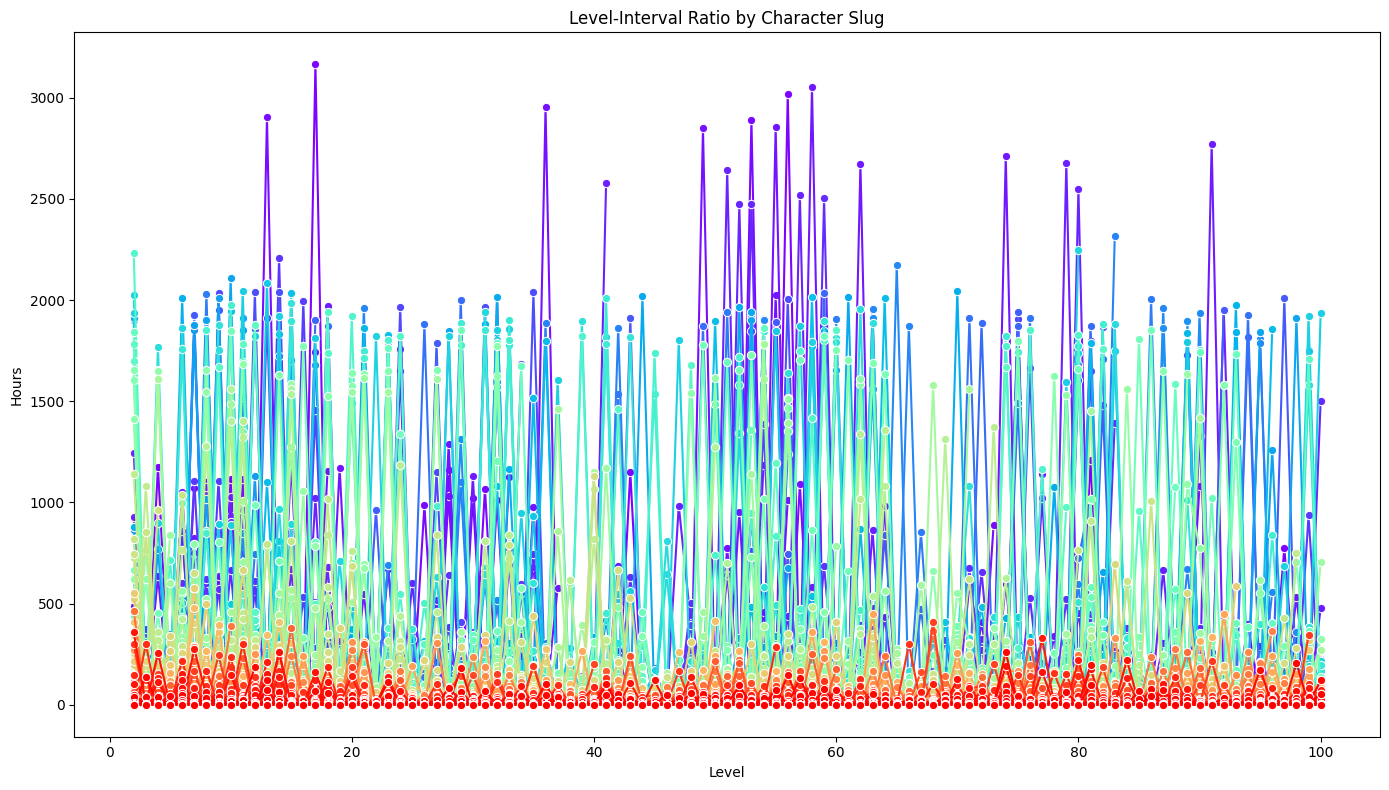

In [35]:
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data_reset, x='level_to', y='interval', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Hours')

# 플롯 표시
plt.tight_layout()
plt.show()

## Removing Outlier

In [2]:
data=pd.read_csv("levelups_panel_20240717.csv", encoding="utf-8")
# level_to 컬럼의 값이 100을 넘는 행 제거
data = data[data['level_to'] <= 100]
data['binge'] = (data['first_session_level'] >= 50).astype(int)
# 각 player_slug별로 비율 계산
data['prev_interval'] = data.groupby('player_slug')['interval'].shift(1)
data['interval_ratio'] = data.apply(lambda row: row['interval'] / (row['prev_interval'] if pd.notnull(row['prev_interval']) else row['interval']), axis=1)
#data.to_csv("LV100.csv",index=False, encoding="utf-8")


In [4]:
#Remove odd ratio data
data.loc[data['interval_ratio'] > 10, 'interval'] = np.nan

data_ratio_term = data[['player_slug','binge', 'level_to', 'interval']]
threshold_df = pd.DataFrame(columns=['Column', 'Threshold'])

# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)
#Remove top 1% value of the interval
columns_to_exclude = ['binge']
for column in pivot_data_ratio.columns:
    # NaN 값을 제외하고 상위 99% 값 계산
    threshold = pivot_data_ratio[column].dropna().quantile(0.975)
    
    pivot_data_ratio.loc[pivot_data_ratio[column] > threshold, column] = np.nan
    # 컬럼명과 threshold 값을 데이터프레임에 추가
    temp_df = pd.DataFrame({'Column': [column], 'Threshold': [threshold]})
    
    # 기존 데이터프레임과 임시 데이터프레임을 결합
    threshold_df = pd.concat([threshold_df, temp_df], ignore_index=True)

pivot_data_reset = pivot_data_ratio.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval')


C:\Users\sunwoong\AppData\Local\Temp\ipykernel_36256\2206438009.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  threshold_df = pd.concat([threshold_df, temp_df], ignore_index=True)


In [5]:
threshold_df

,Column,Threshold
0,2,0.276097
1,3,0.038611
2,4,0.049167
3,5,0.056944
4,6,0.081667
...,...,...
95,97,0.919431
96,98,1.068465
97,99,2.174111
98,100,2.740556


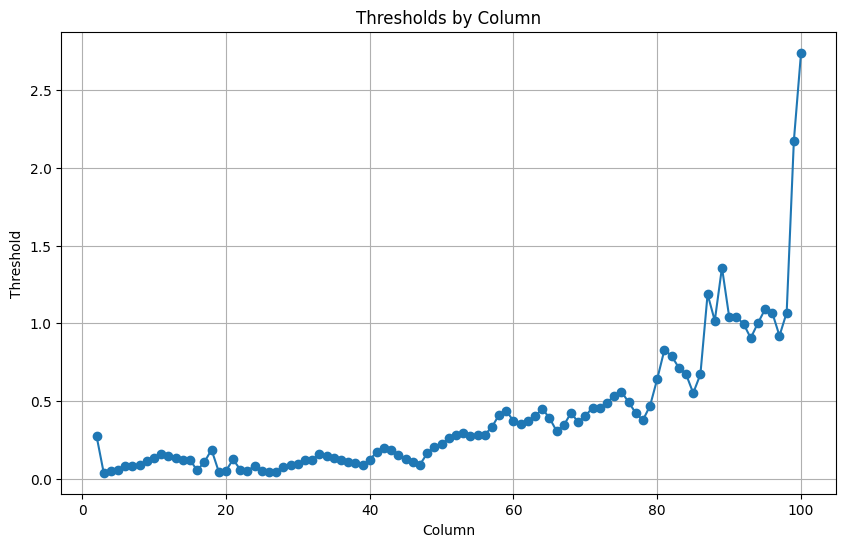

In [6]:
# 마지막 행 드랍
df = threshold_df.drop(threshold_df.index[-1])

# 플롯 그리기
plt.figure(figsize=(10, 6))
plt.plot(df['Column'], df['Threshold'], marker='o')
plt.xlabel('Column')
plt.ylabel('Threshold')
plt.title('Thresholds by Column')
plt.grid(True)
plt.show()

In [244]:
pivot_data_ratio.to_csv('Final_data_before.csv',encoding='utf-8')

In [ ]:
pivot_data_reset.to_csv("Final_removed.csv",index=False,encoding='utf-8')

In [117]:
column_means = pivot_data_ratio.mean(skipna=True)
column_medians = pivot_data_ratio.median(skipna=True)
column_std = pivot_data_ratio.std(skipna=True)


In [118]:
stats_df = pd.DataFrame({
    'Mean': column_means,
    'Median': column_medians,
    'Standard Deviation': column_std
})

In [119]:
stats_df

,Mean,Median,Standard Deviation
2,0.017409,0.010833,0.021655
3,0.008044,0.005556,0.006255
4,0.015900,0.013333,0.008445
5,0.018928,0.016667,0.008650
6,0.025773,0.021667,0.012644
...,...,...,...
97,0.047601,0.003056,0.126200
98,0.062112,0.003056,0.157555
99,0.176566,0.096667,0.279457
100,0.204484,0.114028,0.299779


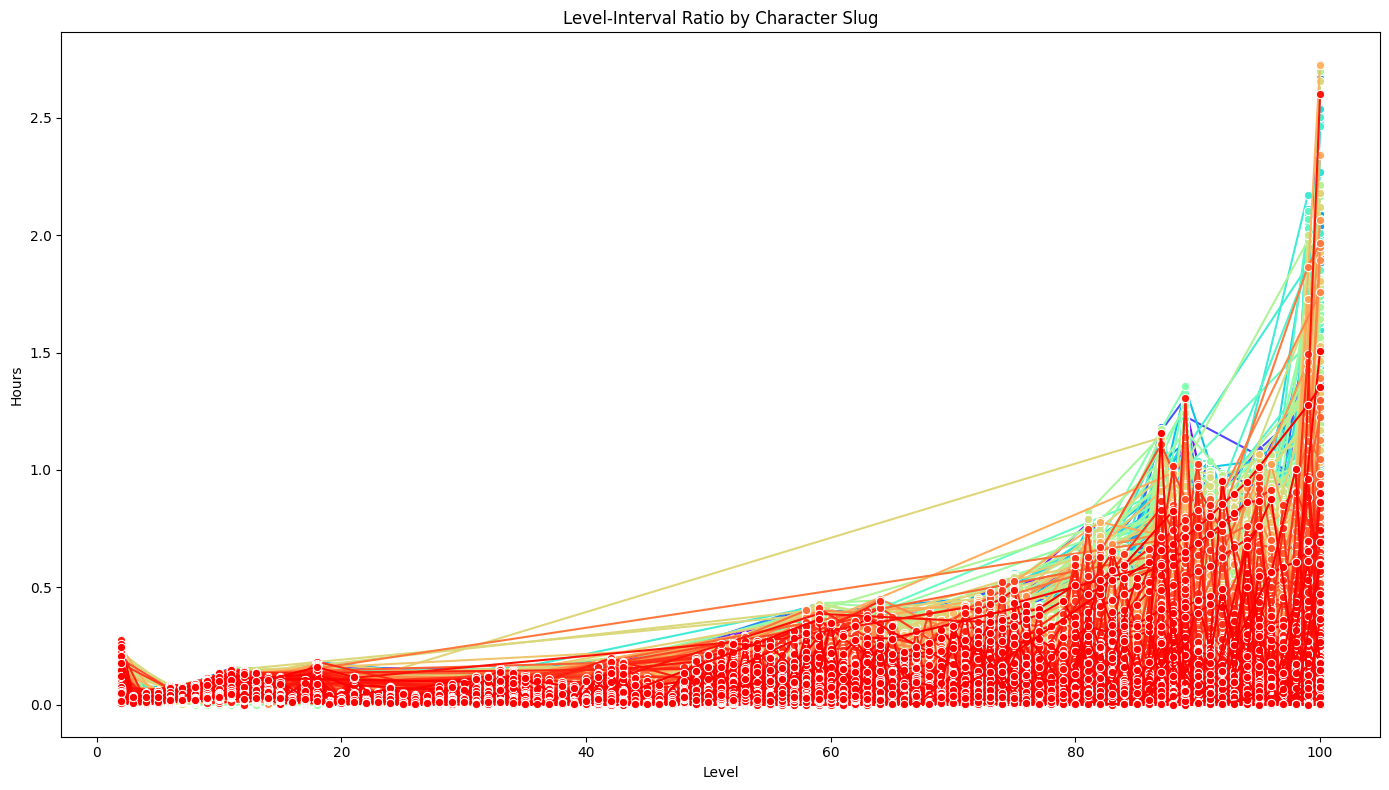

In [120]:
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data_reset, x='level_to', y='interval', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Hours')

# 플롯 표시
plt.tight_layout()
plt.show()

## Difference in Statistics

In [106]:
stats_df_pre = stats_df_pre.drop('binge')
stats_df = stats_df.drop('binge')


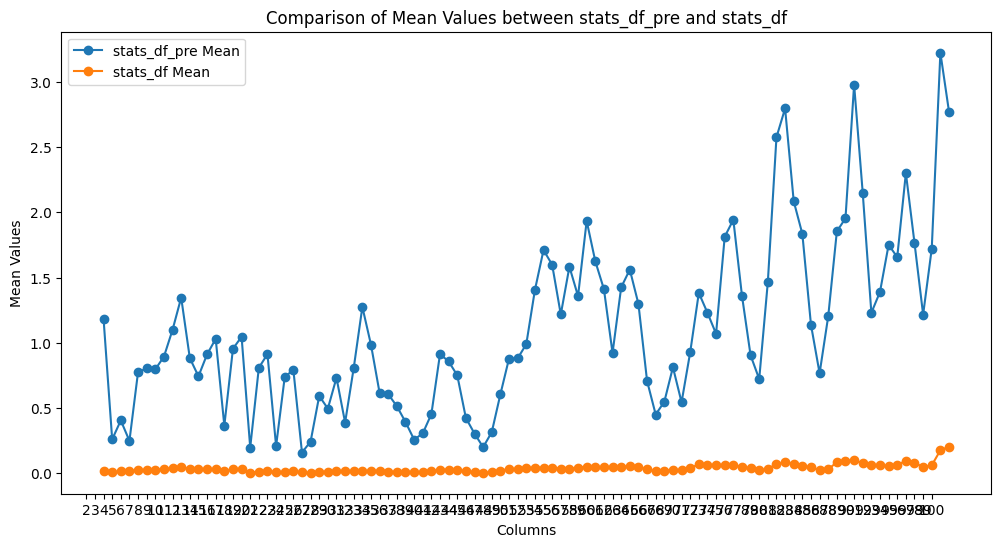

In [110]:
# 플롯 생성
plt.figure(figsize=(12, 6))
width = 0.4

# 현재 위치에서 바의 x 좌표
x = np.arange(len(stats_df_pre.index))

# 두 개의 막대 그래프를 그리기
plt.plot(stats_df_pre.index, stats_df_pre['Mean'], marker='o', label='stats_df_pre Mean')
plt.plot(stats_df.index, stats_df['Mean'], marker='o', label='stats_df Mean')

# 레이블과 제목 추가
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Comparison of Mean Values between stats_df_pre and stats_df')
plt.xticks(x, stats_df_pre.index)
plt.legend()

# 그래프 출력
plt.show()


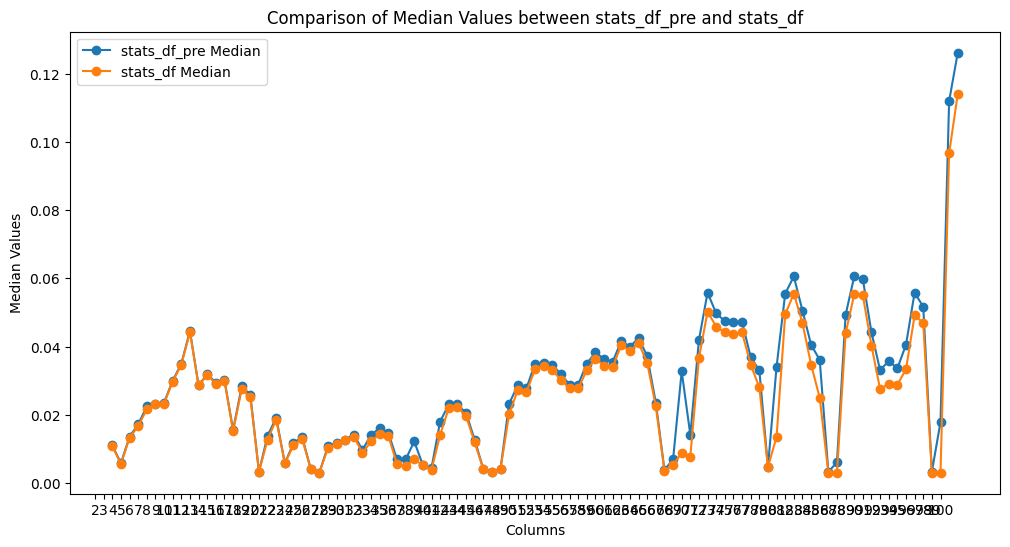

In [112]:
# 플롯 생성
plt.figure(figsize=(12, 6))
width = 0.4

# 현재 위치에서 바의 x 좌표
x = np.arange(len(stats_df_pre.index))

# 두 개의 막대 그래프를 그리기
plt.plot(stats_df_pre.index, stats_df_pre['Median'], marker='o', label='stats_df_pre Median')
plt.plot(stats_df.index, stats_df['Median'], marker='o', label='stats_df Median')

# 레이블과 제목 추가
plt.xlabel('Columns')
plt.ylabel('Median Values')
plt.title('Comparison of Median Values between stats_df_pre and stats_df')
plt.xticks(x, stats_df_pre.index)
plt.legend()

# 그래프 출력
plt.show()


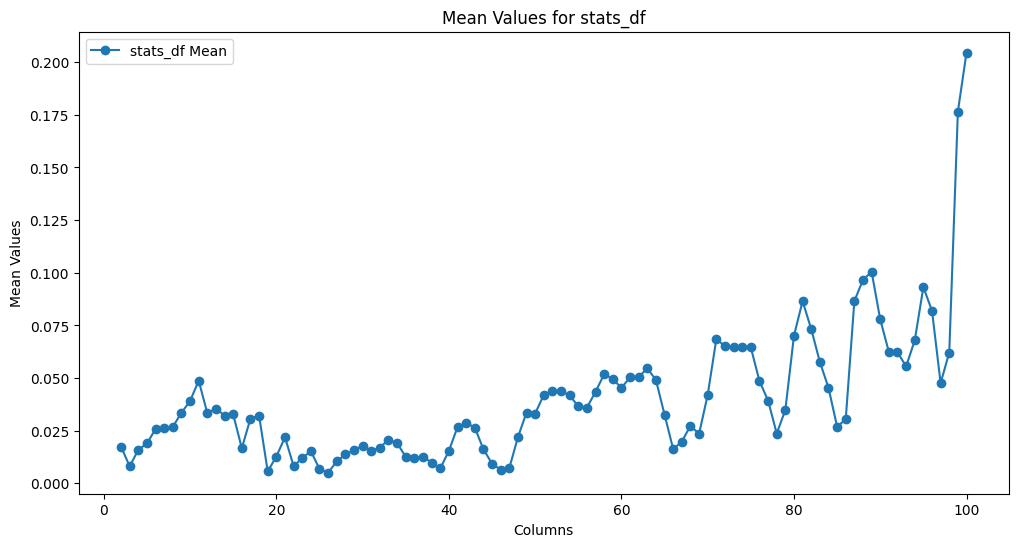

In [111]:
# 플롯 생성
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
plt.plot(stats_df.index, stats_df['Mean'], marker='o', label='stats_df Mean')

# 레이블과 제목 추가
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values for stats_df')
plt.legend()

# 그래프 출력
plt.show()

## Synthetic Control

In [245]:
import numpy as np
import pandas as pd
import cvxpy as cp
from tqdm import tqdm
#pivot_data_ratio =pd.read_csv("Before_Synthetic.csv",encoding='utf-8')
pivot_data_ratio =pd.read_csv("Final_data_before.csv",encoding='utf-8')
origin_data=pd.read_csv("levelups_panel_20240717.csv",encoding='utf-8')

In [246]:
pivot_data_ratio

,player_slug,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,binge
0,2021-10-31T16:01:57.631Z,0.009444,NaN,0.026389,NaN,0.052222,0.020833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021-10-31T23:13:52.512Z,0.014444,0.008611,0.018889,0.019722,0.032500,0.025278,0.026667,0.035000,0.040833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021-11-01T00:29:22.357Z,0.016944,0.004722,0.008889,0.016389,0.018611,0.020833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021-11-01T03:34:17.980Z,0.012500,0.012778,0.018333,0.014444,0.033889,0.023056,0.025556,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021-11-01T05:12:15.383Z,0.024722,0.011389,0.035833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,2022-03-30T13:53:30.032Z,0.011111,0.003889,0.010278,0.015833,0.043333,0.022222,0.023889,0.029722,0.033889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59338,2022-03-30T14:09:03.502Z,0.009167,0.009444,0.028333,0.028889,0.025278,0.024444,0.025000,0.031389,0.043056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59339,2022-03-30T14:13:23.546Z,0.009167,0.006389,0.009167,0.018056,0.015833,0.028889,0.020833,0.031667,0.036111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59340,2022-03-30T14:20:04.049Z,0.016389,0.006111,0.012500,0.013889,0.014167,0.026111,0.021389,0.028889,0.033889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [248]:
# other_data를 before_synthetic에 병합
for i, row in tqdm(origin_data.iterrows(), total=origin_data.shape[0]):
    player = row['player_slug']
    level_to = str(row['level_to'])
    if player in pivot_data_ratio['player_slug'].values and level_to in pivot_data_ratio.columns:
        origin_data.loc[i, 'interval'] = pivot_data_ratio.loc[pivot_data_ratio['player_slug'] == player, level_to].values[0]


  0%|          | 0/2466997 [00:00<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
origin_data.to_csv("levelups_panel_20240719_new.csv", index=False,encoding="utf-8")
origin_data.to_csv("levelups_panel_20240719_newcp949.csv", index=False,encoding="cp949")

In [63]:
origin_data:

,player_slug,character_slug,first_session_level,binger,total_purchase,total_ad,highest_level,status,level_from,level_to,...,playtime_tower,playtime_pvp,playtime_farm,playtime_survival,playtime_side,date_event,date_event_prev,same_date,date_interval,binge
0,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,1,2,...,0.0,0.0,0.0,0.0,0.0,2021-11-04,2021-11-04,True,0.009444,1
1,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,2,3,...,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-04,False,5.426389,1
2,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,3,4,...,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,1
3,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,4,5,...,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,1
4,2021-10-31T16:01:57.631Z,킹덤,2,0,0.0,0.0,7,complete,5,6,...,0.0,0.0,0.0,0.0,0.0,2021-11-13,2021-11-13,True,5.426389,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2466992,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,3,4,...,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0
2466993,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,4,5,...,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0
2466994,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,5,6,...,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0
2466995,2022-03-30T14:36:22.522Z,킹키킹,8,0,0.0,0.0,8,complete,6,7,...,0.0,0.0,0.0,0.0,0.0,2022-03-30,2022-03-30,True,0.236667,0


## Filling in the missing value

In [254]:
data=pd.read_csv("levelups_panel_20240719neww.csv",encoding="utf-8")

In [255]:
focal_data = data[['player_slug','interval','first_session_level','binge','level_from','level_to','purchase','highest_level',
                   'death','ad_revival','ad_item','playtime_side']]
focal_data = focal_data[focal_data['level_to'] <= 100]

In [256]:
focal_data['interval'].max()
max_interval_index = focal_data['interval'].idxmax()
max_interval_row = focal_data.loc[max_interval_index]
max_interval_row


player_slug            2021-12-17T14:18:24.590Z
interval                               2.727778
first_session_level                          51
binge                                         0
level_from                                   99
level_to                                    100
purchase                                    0.0
highest_level                               160
death                                       1.0
ad_revival                                  1.0
ad_item                                     3.0
playtime_side                               0.0
Name: 213636, dtype: object

In [257]:
# interval 열의 결측치 개수 확인
print(focal_data['interval'].isna().sum())

# 결측치가 있는 행 확인
print(focal_data[focal_data['interval'].isna()])
focal_data['level_to'] = focal_data['level_to'].astype(int)

185672
                      player_slug  interval  first_session_level  binge  \
1        2021-10-31T16:01:57.631Z       NaN                    2      1   
3        2021-10-31T16:01:57.631Z       NaN                    2      1   
31       2021-11-01T05:12:15.383Z       NaN                    5      0   
63       2021-11-01T07:31:49.366Z       NaN                   51      0   
67       2021-11-01T07:31:49.366Z       NaN                   51      0   
...                           ...       ...                  ...    ...   
2466873  2022-03-30T13:22:16.823Z       NaN                   33      0   
2466884  2022-03-30T13:22:16.823Z       NaN                   33      0   
2466885  2022-03-30T13:22:16.823Z       NaN                   33      0   
2466920  2022-03-30T13:53:30.032Z       NaN                   49      0   
2466955  2022-03-30T14:13:23.546Z       NaN                   22      0   

         level_from  level_to  purchase  highest_level  death  ad_revival  \
1              

In [ ]:
sampled_data = focal_data.sample(n=200, random_state=102)
print(sampled_data[sampled_data['interval'].isna()])
print(sampled_data['interval'].isna().sum())

In [260]:
from sklearn.neighbors import NearestNeighbors
from scipy.optimize import minimize
import warnings

# 경고 메시지 억제
warnings.filterwarnings("ignore", message="X does not have valid feature names, but NearestNeighbors was fitted with feature names")

def fill_missing_intervals(data,k=5):
    complete_data = data.dropna(subset=['interval'])
    missing_data = data[data['interval'].isnull()]
    
    # level_from과 level_to 외의 다른 feature들을 추가
    features = ['level_to','death','playtime_side','ad_revival','purchase','highest_level','ad_item']
    
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(complete_data[features])

    for index, row in tqdm(missing_data.iterrows(), total=missing_data.shape[0], desc="Filling missing intervals"):
        # feature 값을 2차원 배열로 변환하여 전달
        distances, indices = knn.kneighbors([row[features].values])
        neighbor_intervals = complete_data.iloc[indices[0]]['interval']
        predicted_interval = np.mean(neighbor_intervals)
        
        data.at[index, 'interval'] = predicted_interval
    
    return data

data_filled = fill_missing_intervals(focal_data)


Filling missing intervals: 100%|██████████| 185672/185672 [01:32<00:00, 2012.78it/s]


In [261]:
data_filled['interval'].max()
max_interval_index = data_filled['interval'].idxmax()
max_interval_row = data_filled.loc[max_interval_index]
max_interval_row

player_slug            2021-12-17T14:18:24.590Z
interval                               2.727778
first_session_level                          51
binge                                         0
level_from                                   99
level_to                                    100
purchase                                    0.0
highest_level                               160
death                                       1.0
ad_revival                                  1.0
ad_item                                     3.0
playtime_side                               0.0
Name: 213636, dtype: object

In [262]:
print(data_filled[data_filled['interval'].isna()])

Empty DataFrame
Columns: [player_slug, interval, first_session_level, binge, level_from, level_to, purchase, highest_level, death, ad_revival, ad_item, playtime_side]
Index: []


In [147]:
def fill_missing_intervals(data):
    complete_data = data.dropna(subset=['interval'])
    missing_data = data[data['interval'].isnull()]
    
    # level_from과 level_to 외의 다른 feature들을 추가
    features = ['level_to','death','total_ad','playtime_side','ad_revival']
    
    for index, row in tqdm(missing_data.iterrows(), total=missing_data.shape[0], desc="Filling missing intervals"):
        # Synthetic control을 만들기 위해 가중합을 계산
        weights = []
        for i, r in complete_data.iterrows():
            weight = np.exp(-np.linalg.norm(row[features] - r[features]))
            weights.append(weight)
        
        weights = np.array(weights) / np.sum(weights)
        predicted_interval = np.dot(weights, complete_data['interval'])
        
        data.at[index, 'interval'] = predicted_interval
    
    return data
data_filled = fill_missing_intervals(sampled_data)


Filling missing intervals: 100%|██████████| 7/7 [00:00<00:00, 23.17it/s]


In [144]:
	
from scipy.optimize import minimize
def fill_missing_intervals(data):
    complete_data = data.dropna(subset=['interval'])
    missing_data = data[data['interval'].isnull()]
    
    # level_from과 level_to 외의 다른 feature들을 추가
    features = ['level_to','death','total_ad','playtime_side','ad_revival']
    
    for index, row in tqdm(missing_data.iterrows(), total=missing_data.shape[0], desc="Filling missing intervals"):
        # X0: 대조군 데이터, X1: 처리 유닛 데이터
        X0 = complete_data[features].values
        X1 = row[features].values
        
        def objective(weights):
            return np.sum((X1 - X0.T.dot(weights)) ** 2)
        
        cons = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
        bounds = [(0, 1)] * X0.shape[0]
        initial_weights = np.ones(X0.shape[0]) / X0.shape[0]
        
        result = minimize(objective, initial_weights, bounds=bounds, constraints=cons)
        weights = result.x
        predicted_interval = np.dot(weights, complete_data['interval'])
        
        data.at[index, 'interval'] = predicted_interval
    
    return data
data_filled = fill_missing_intervals(sampled_data)


Filling missing intervals: 100%|██████████| 7/7 [00:00<00:00, 14.28it/s]


In [264]:
# 결과 저장
output_file_path = 'focal_data_filled_final.csv'
data_filled.to_csv(output_file_path, index=False,encoding='utf-8')

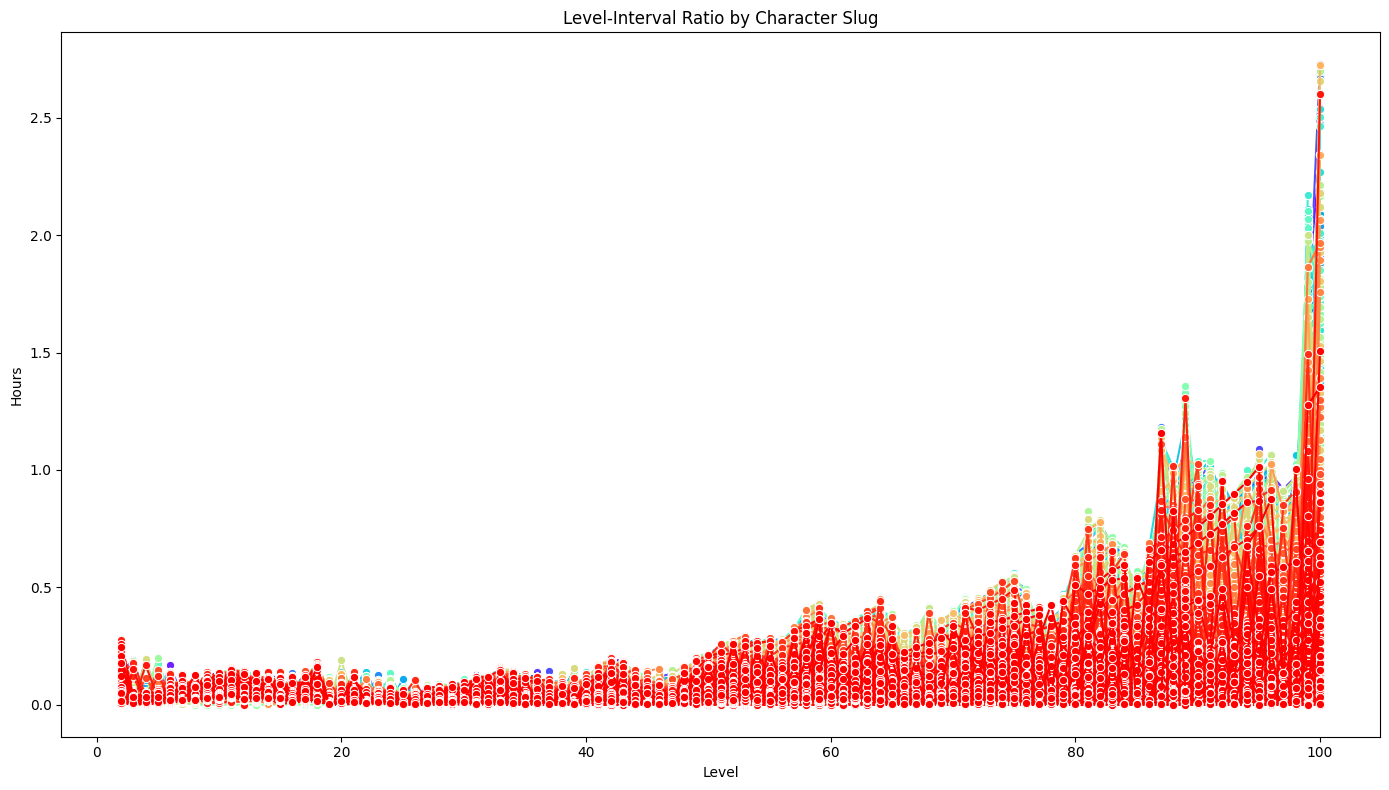

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_filled, x='level_to', y='interval', hue='player_slug', palette='rainbow', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval Ratio by Character Slug')
plt.xlabel('Level')
plt.ylabel('Hours')

# 플롯 표시
plt.tight_layout()
plt.show()

In [277]:
data_filled

,player_slug,interval,first_session_level,binge,level_from,level_to,purchase,highest_level,death,ad_revival,ad_item,playtime_side
0,2021-10-31T16:01:57.631Z,0.009444,2,1,1,2,0.0,7,0.0,0.0,0.0,0.0
1,2021-10-31T16:01:57.631Z,0.008222,2,1,2,3,0.0,7,0.0,0.0,0.0,0.0
2,2021-10-31T16:01:57.631Z,0.026389,2,1,3,4,0.0,7,0.0,0.0,0.0,0.0
3,2021-10-31T16:01:57.631Z,0.018278,2,1,4,5,0.0,7,0.0,0.0,0.0,0.0
4,2021-10-31T16:01:57.631Z,0.052222,2,1,5,6,0.0,7,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2466992,2022-03-30T14:36:22.522Z,0.033889,8,0,3,4,0.0,8,0.0,0.0,0.0,0.0
2466993,2022-03-30T14:36:22.522Z,0.034722,8,0,4,5,0.0,8,0.0,0.0,0.0,0.0
2466994,2022-03-30T14:36:22.522Z,0.019722,8,0,5,6,0.0,8,0.0,0.0,0.0,0.0
2466995,2022-03-30T14:36:22.522Z,0.022222,8,0,6,7,0.0,8,0.0,0.0,0.0,0.0


In [280]:
data_filled['binge'] = data_filled['first_session_level'].apply(lambda x: 1 if x >= 50 else 0)


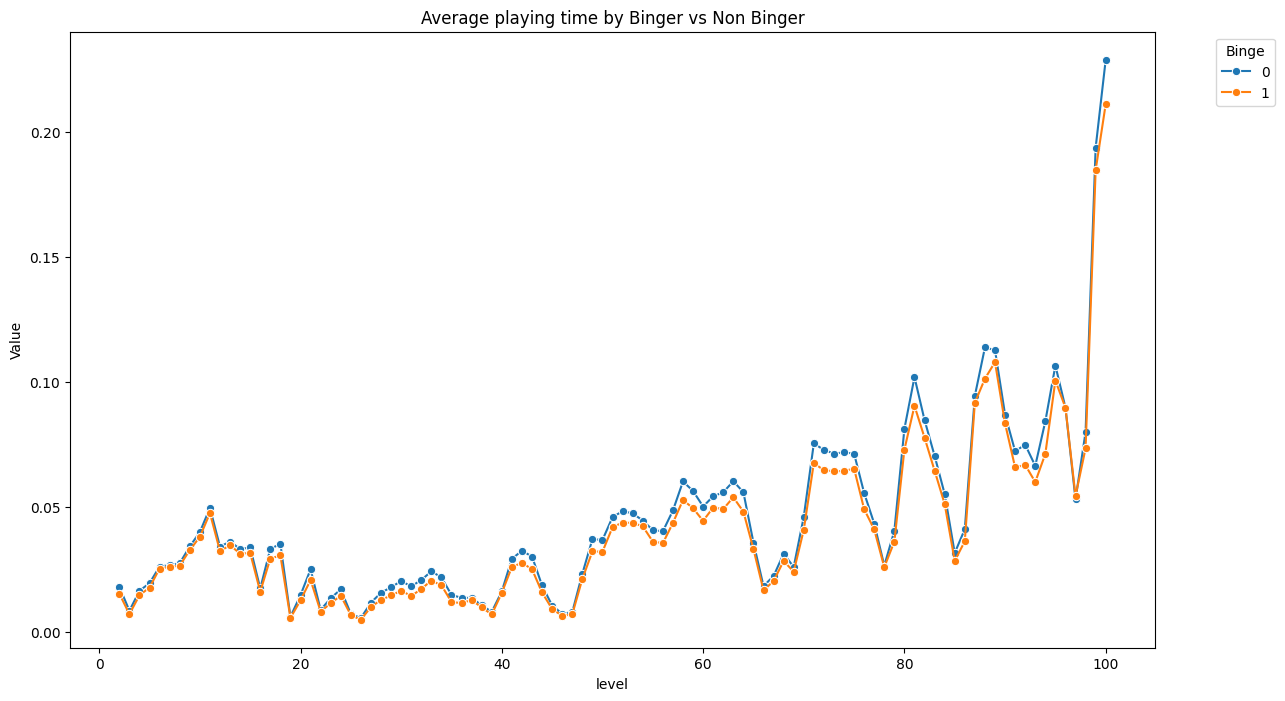

In [281]:
# binge 여부에 따라 레벨 별 평균 value 계산
avg_values = data_filled.groupby(['binge', 'level_to'])['interval'].mean().reset_index()

# 시각화
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_values, x='level_to', y='interval', hue='binge', marker='o')

plt.title('Average playing time by Binger vs Non Binger')
plt.xlabel('level')
plt.ylabel('Value')
plt.legend(title='Binge', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [266]:

data_ratio_term = data_filled[['player_slug','binge', 'level_to', 'interval']]


In [267]:
# 데이터 피벗
pivot_data_ratio = data_ratio_term.pivot_table(index='player_slug', columns='level_to', values='interval', aggfunc='mean')
binge_series = data.drop_duplicates('player_slug').set_index('player_slug')['binge']
pivot_data_ratio = pivot_data_ratio.join(binge_series)
#pivot_data_ratio[pivot_data_ratio > 10] = np.nan

pivot_data_reset = pivot_data_ratio.reset_index().melt(id_vars=['player_slug', 'binge'], var_name='level_to', value_name='interval')


In [268]:
column_means = pivot_data_ratio.mean(skipna=True)
column_medians = pivot_data_ratio.median(skipna=True)
column_std = pivot_data_ratio.std(skipna=True)

In [269]:
stats_df = pd.DataFrame({
    'Mean': column_means,
    'Median': column_medians,
    'Standard Deviation': column_std
})

In [273]:
stats_df = stats_df.drop('binge')

In [274]:
stats_df

,Mean,Median,Standard Deviation
2,0.017391,0.011111,0.021540
3,0.008086,0.005833,0.006730
4,0.015980,0.013333,0.008614
5,0.019023,0.016944,0.008770
6,0.025873,0.021944,0.012679
...,...,...,...
96,0.089660,0.050556,0.140138
97,0.053794,0.003056,0.126149
98,0.075790,0.005278,0.148624
99,0.188017,0.116111,0.240174


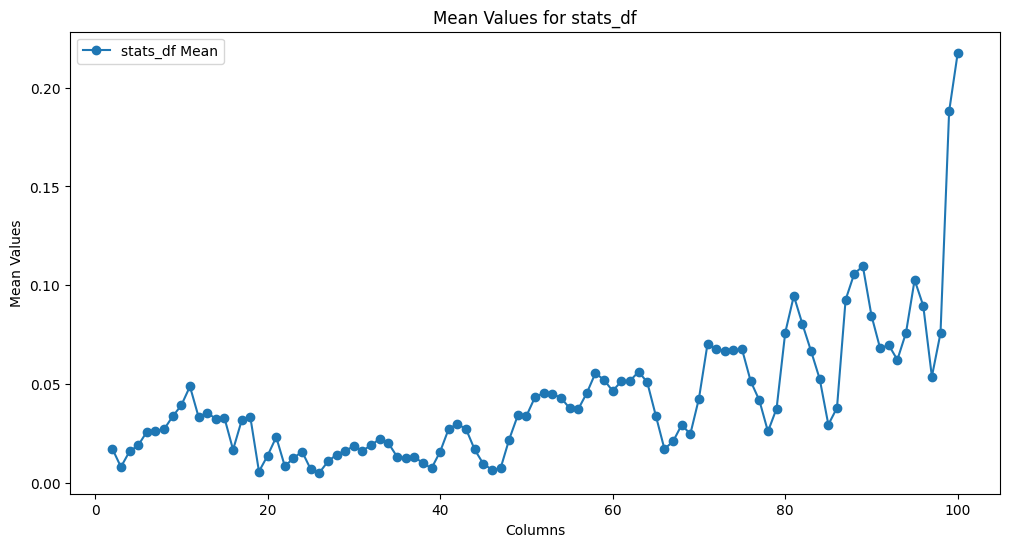

In [275]:
# 플롯 생성
plt.figure(figsize=(12, 6))

# 선 그래프 그리기
plt.plot(stats_df.index, stats_df['Mean'], marker='o', label='stats_df Mean')

# 레이블과 제목 추가
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values for stats_df')
plt.legend()

# 그래프 출력
plt.show()

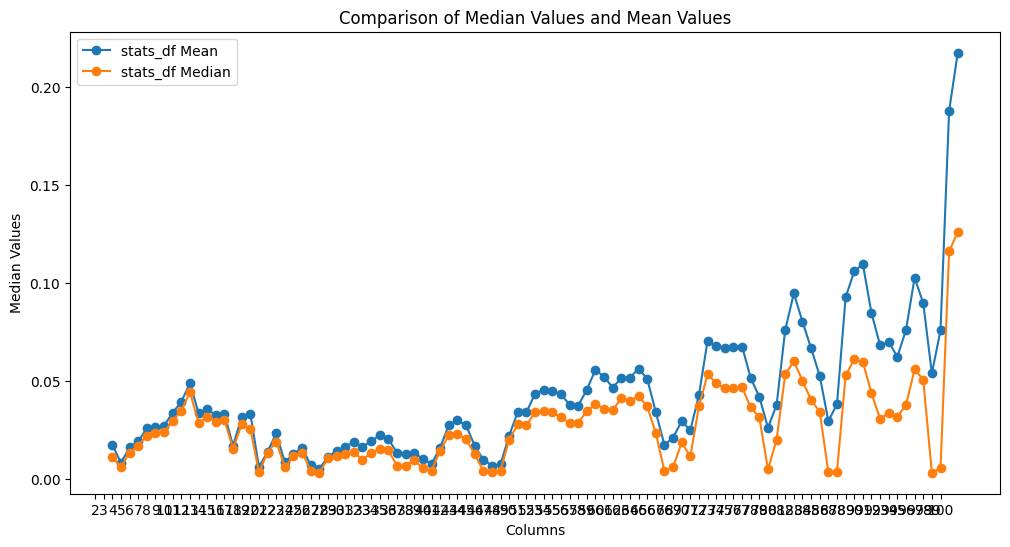

In [276]:
# 플롯 생성
plt.figure(figsize=(12, 6))
width = 0.4

# 현재 위치에서 바의 x 좌표
x = np.arange(len(stats_df.index))

# 두 개의 막대 그래프를 그리기
plt.plot(stats_df.index, stats_df['Mean'], marker='o', label='stats_df Mean')
plt.plot(stats_df.index, stats_df['Median'], marker='o', label='stats_df Median')

# 레이블과 제목 추가
plt.xlabel('Columns')
plt.ylabel('Median Values')
plt.title('Comparison of Median Values and Mean Values')
plt.xticks(x, stats_df.index)
plt.legend()

# 그래프 출력
plt.show()

## Making 1~50

In [27]:
import numpy as np
import pandas as pd
import cvxpy as cp
pivot_data_ratio =pd.read_csv("Before_Synthetic.csv",encoding='utf-8')

pivot_data_ratio_reset = pivot_data_ratio.reset_index(drop=True)
player_slug_backup = pivot_data_ratio_reset['player_slug']
data_filtered = pivot_data_ratio_reset.drop(columns=['player_slug'])



In [28]:
pivot_data_ratio


,player_slug,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,binge
0,2021-10-31T16:01:57.631Z,0.009444,NaN,0.026389,NaN,0.052222,0.020833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021-10-31T23:13:52.512Z,0.014444,0.008611,0.018889,0.019722,0.032500,0.025278,0.026667,0.035000,0.040833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021-11-01T00:29:22.357Z,0.016944,0.004722,0.008889,0.016389,0.018611,0.020833,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021-11-01T03:34:17.980Z,0.012500,0.012778,0.018333,0.014444,0.033889,0.023056,0.025556,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021-11-01T05:12:15.383Z,0.024722,0.011389,0.035833,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,2022-03-30T13:53:30.032Z,0.011111,0.003889,0.010278,0.015833,0.043333,0.022222,0.023889,0.029722,0.033889,...,0.015278,0.013056,0.003611,0.002222,0.002778,0.006944,0.034167,0.019167,NaN,0.0
59338,2022-03-30T14:09:03.502Z,0.009167,0.009444,0.028333,0.028889,0.025278,0.024444,0.025000,0.031389,0.043056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59339,2022-03-30T14:13:23.546Z,0.009167,0.006389,0.009167,0.018056,0.015833,0.028889,0.020833,0.031667,0.036111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59340,2022-03-30T14:20:04.049Z,0.016389,0.006111,0.012500,0.013889,0.014167,0.026111,0.021389,0.028889,0.033889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [19]:
data_no_nulls = data_filtered.dropna()
data_no_nulls

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,binge
77,0.007222,0.003056,0.008889,0.013333,0.013889,0.024167,0.026944,0.032778,0.030278,0.038611,...,0.006111,0.023611,0.007778,0.038056,0.021111,0.031389,0.006111,0.003611,0.006667,1.0
96,0.008056,0.005556,0.015833,0.026667,0.025278,0.023333,0.021667,0.026667,0.031944,0.044444,...,0.022778,0.012500,0.022500,0.007778,0.024722,0.026667,0.028056,0.016111,0.005278,1.0
110,0.008889,0.003611,0.016667,0.006111,0.016944,0.020556,0.021111,0.027778,0.031389,0.043333,...,0.006111,0.017222,0.013889,0.016944,0.014444,0.010278,0.005833,0.003333,0.008056,1.0
115,0.008056,0.008056,0.026944,0.010278,0.017500,0.022500,0.025278,0.033889,0.035833,0.046667,...,0.023611,0.016944,0.012222,0.006111,0.003056,0.003333,0.015833,0.023333,0.020000,1.0
130,0.015556,0.004722,0.015833,0.014444,0.028333,0.023333,0.023056,0.029722,0.037222,0.045000,...,0.026111,0.014722,0.004444,0.004722,0.003611,0.005278,0.030556,0.035556,0.100833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59196,0.009167,0.004722,0.013333,0.011944,0.037778,0.025833,0.023056,0.026944,0.033889,0.041944,...,0.016944,0.015278,0.004444,0.003056,0.003056,0.013889,0.040556,0.035833,0.045000,1.0
59263,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,0.036944,0.037778,...,0.020000,0.023889,0.012778,0.005833,0.003333,0.003333,0.014444,0.037500,0.026389,1.0
59272,0.013889,0.006389,0.016389,0.021667,0.021667,0.023333,0.026111,0.031111,0.087500,0.046389,...,0.020278,0.021944,0.004444,0.003333,0.003333,0.023611,0.047778,0.039444,0.055000,1.0
59280,0.006389,0.003611,0.007778,0.010556,0.015556,0.045278,0.065000,0.102778,0.079444,0.056389,...,0.022500,0.013889,0.016944,0.004167,0.003333,0.003056,0.027500,0.025556,0.031389,1.0


In [22]:
pre_treatment_period = data_filtered.dropna()
control_columns = [col for col in data_filtered.columns if col != 'binge']
control_columns

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,binge
77,0.007222,0.003056,0.008889,0.013333,0.013889,0.024167,0.026944,0.032778,0.030278,0.038611,...,0.006111,0.023611,0.007778,0.038056,0.021111,0.031389,0.006111,0.003611,0.006667,1.0
96,0.008056,0.005556,0.015833,0.026667,0.025278,0.023333,0.021667,0.026667,0.031944,0.044444,...,0.022778,0.012500,0.022500,0.007778,0.024722,0.026667,0.028056,0.016111,0.005278,1.0
110,0.008889,0.003611,0.016667,0.006111,0.016944,0.020556,0.021111,0.027778,0.031389,0.043333,...,0.006111,0.017222,0.013889,0.016944,0.014444,0.010278,0.005833,0.003333,0.008056,1.0
115,0.008056,0.008056,0.026944,0.010278,0.017500,0.022500,0.025278,0.033889,0.035833,0.046667,...,0.023611,0.016944,0.012222,0.006111,0.003056,0.003333,0.015833,0.023333,0.020000,1.0
130,0.015556,0.004722,0.015833,0.014444,0.028333,0.023333,0.023056,0.029722,0.037222,0.045000,...,0.026111,0.014722,0.004444,0.004722,0.003611,0.005278,0.030556,0.035556,0.100833,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59196,0.009167,0.004722,0.013333,0.011944,0.037778,0.025833,0.023056,0.026944,0.033889,0.041944,...,0.016944,0.015278,0.004444,0.003056,0.003056,0.013889,0.040556,0.035833,0.045000,1.0
59263,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,0.036944,0.037778,...,0.020000,0.023889,0.012778,0.005833,0.003333,0.003333,0.014444,0.037500,0.026389,1.0
59272,0.013889,0.006389,0.016389,0.021667,0.021667,0.023333,0.026111,0.031111,0.087500,0.046389,...,0.020278,0.021944,0.004444,0.003333,0.003333,0.023611,0.047778,0.039444,0.055000,1.0
59280,0.006389,0.003611,0.007778,0.010556,0.015556,0.045278,0.065000,0.102778,0.079444,0.056389,...,0.022500,0.013889,0.016944,0.004167,0.003333,0.003056,0.027500,0.025556,0.031389,1.0


In [25]:
from sklearn.impute import SimpleImputer
import numpy as np

# Synthetic control method를 위해 SimpleImputer 초기화 (mean 전략 사용)
imputer = SimpleImputer(strategy='mean')

# 2~50 열의 결측치 채우기
data_filtered.iloc[:, 1:50] = imputer.fit_transform(data_filtered.iloc[:, 1:50])

# 결측치가 채워진 후 데이터프레임 출력
print("결측치를 채운 후 데이터:")
print(data_filtered.head())

결측치를 채운 후 데이터:
          2         3         4         5         6         7         8  \
0  0.009444  0.008044  0.026389  0.018928  0.052222  0.020833  0.026826   
1  0.014444  0.008611  0.018889  0.019722  0.032500  0.025278  0.026667   
2  0.016944  0.004722  0.008889  0.016389  0.018611  0.020833  0.026826   
3  0.012500  0.012778  0.018333  0.014444  0.033889  0.023056  0.025556   
4  0.024722  0.011389  0.035833  0.018928  0.025773  0.026282  0.026826   

          9        10        11  ...        42        43        44        45  \
0  0.033506  0.039084  0.048751  ...  0.028801  0.026486  0.016253  0.009321   
1  0.035000  0.040833  0.048751  ...  0.028801  0.026486  0.016253  0.009321   
2  0.033506  0.039084  0.048751  ...  0.028801  0.026486  0.016253  0.009321   
3  0.033506  0.039084  0.048751  ...  0.028801  0.026486  0.016253  0.009321   
4  0.033506  0.039084  0.048751  ...  0.028801  0.026486  0.016253  0.009321   

         46        47        48        49        50  

In [26]:
data_filtered

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,binge
0,0.009444,0.008044,0.026389,0.018928,0.052222,0.020833,0.026826,0.033506,0.039084,0.048751,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
1,0.014444,0.008611,0.018889,0.019722,0.032500,0.025278,0.026667,0.035000,0.040833,0.048751,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
2,0.016944,0.004722,0.008889,0.016389,0.018611,0.020833,0.026826,0.033506,0.039084,0.048751,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
3,0.012500,0.012778,0.018333,0.014444,0.033889,0.023056,0.025556,0.033506,0.039084,0.048751,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
4,0.024722,0.011389,0.035833,0.018928,0.025773,0.026282,0.026826,0.033506,0.039084,0.048751,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,0.011111,0.003889,0.010278,0.015833,0.043333,0.022222,0.023889,0.029722,0.033889,0.042778,...,0.015278,0.013056,0.003611,0.002222,0.002778,0.006944,0.034167,0.019167,0.033158,0.0
59338,0.009167,0.009444,0.028333,0.028889,0.025278,0.024444,0.025000,0.031389,0.043056,0.047500,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
59339,0.009167,0.006389,0.009167,0.018056,0.015833,0.028889,0.020833,0.031667,0.036111,0.042500,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0
59340,0.016389,0.006111,0.012500,0.013889,0.014167,0.026111,0.021389,0.028889,0.033889,0.045556,...,0.028801,0.026486,0.016253,0.009321,0.006485,0.007123,0.021896,0.033603,0.033158,0.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from toolz import partial
from scipy.optimize import fmin_slsqp
import random
from tqdm import tqdm

class SyntheticControl:
    def __init__(self, data0, data1, col, method='linear'):
        self.X0 = data0.drop(col, axis=1)
        self.X1 = data1.drop(col, axis=1)
        self.y0 = data0[col]
        self.y1 = data1[col]

        self.col = col
        self.donor_pool = self.X0.columns
        self.method = method
        if self.method in ['robust_l1', 'robust_l2']:
            self._scaling

    def get(self, k=3, eta='Auto'):
        if self.method == 'linear':
            synthetic_y0, synthetic_y1 = self._linear_control()
            return synthetic_y0, synthetic_y1

        elif self.method == 'robust_l1':
            synthetic_y0, synthetic_y1 = self._robust_l1_control(k, eta)
            return synthetic_y0, synthetic_y1

        elif self.method == 'robust_l2':
            synthetic_y0, synthetic_y1 = self._robust_l2_control(k, eta)
            return synthetic_y0, synthetic_y1
        else:
            raise Exception("Only 'linear', 'robust_l1', 'robust_l2' are available.")

    def _linear_control(self):
        def loss_w(W, X, y):
            return np.sqrt(np.mean((y - X.dot(W)) ** 2))

        w_start = [1 / self.X0.shape[1]] * self.X0.shape[1]

        weights = fmin_slsqp(partial(loss_w, X=self.X0, y=self.y0),
                             np.array(w_start),
                             f_eqcons=lambda x: np.sum(x) - 1,
                             bounds=[(0.0, 1.0)] * len(w_start),
                             disp=False)

        self.W = weights
        synthetic_y0 = np.asarray(self.X0).dot(self.W)
        synthetic_y1 = np.asarray(self.X1).dot(self.W)

        return synthetic_y0, synthetic_y1

    # ... (other methods remain unchanged)
    # Include _robust_l1_control, _robust_l2_control, _denoising, svd_ploting,
    # _scaling, _inv_scaling, and _forward_chain_CV methods here

def fill_missing_values_with_synthetic_control(data, preprocess_period):
    data_filled = data.copy()
    columns_to_process = data.columns[:preprocess_period]
    
    for column in tqdm(columns_to_process, desc='Processing columns'):
        if data[column].isna().sum() > 0:
            # 결측치가 있는 행과 없는 행 분리
            complete_cases = data.dropna(subset=[column])
            incomplete_cases = data[data[column].isna()]
            
            if complete_cases.shape[0] < 2:  # 충분한 데이터가 없는 경우 스킵
                continue
            
            # X0: 대조군 데이터, X1: 처리 유닛 데이터
            sc = SyntheticControl(complete_cases, incomplete_cases, column, method='linear')
            synthetic_y0, synthetic_y1 = sc.get()
            
            # 결측치 채우기
            for idx in incomplete_cases.index:
                data_filled.at[idx, column] = synthetic_y1[incomplete_cases.index.get_loc(idx)]
    
    return data_filled

In [7]:
# Set the preprocess period (number of columns to process)
preprocess_period = len(control_columns)

# Apply synthetic control to fill missing values
filled_data = fill_missing_values_with_synthetic_control(data_filtered, preprocess_period)


Processing columns: 100%|██████████| 49/49 [00:26<00:00,  1.82it/s]


In [8]:
filled_data

,2,3,4,5,6,7,8,9,10,11,...,42,43,44,45,46,47,48,49,50,binge
0,0.009444,NaN,0.026389,NaN,0.052222,0.020833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,0.014444,0.008611,0.018889,0.019722,0.032500,0.025278,0.026667,0.035000,0.040833,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,0.016944,0.004722,0.008889,0.016389,0.018611,0.020833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0.012500,0.012778,0.018333,0.014444,0.033889,0.023056,0.025556,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,0.024722,0.011389,0.035833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59337,0.011111,0.003889,0.010278,0.015833,0.043333,0.022222,0.023889,0.029722,0.033889,0.042778,...,0.015278,0.013056,0.003611,0.002222,0.002778,0.006944,0.034167,0.019167,NaN,0.0
59338,0.009167,0.009444,0.028333,0.028889,0.025278,0.024444,0.025000,0.031389,0.043056,0.047500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59339,0.009167,0.006389,0.009167,0.018056,0.015833,0.028889,0.020833,0.031667,0.036111,0.042500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
59340,0.016389,0.006111,0.012500,0.013889,0.014167,0.026111,0.021389,0.028889,0.033889,0.045556,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
